In [107]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_excel("Quejas.xlsx")
df.head()

,ID_EXP,FECHA_INGRESO,FECHA_FIN,FECHA DE CIERRE,TIPO_CONCILIACION,ESTADO_PROCESAL,PROVEEDOR,NOMBRE_COMERCIAL,GIRO,SECTOR,...,COSTO BIEN SERVICIO,MONTO RECLAMADO,MONTO RECUPERADO,PROCEDIMIENTO,BIEN O SERV,MEDIO INGRESO,TIPO PROD,MODALIDAD COMPRA,MODALIDAD PAGO,PROB ESPECIAL
0,2022_3584,2022-01-03,2022-08-15 00:00:00,2022-08-15 00:00:00,Turnada a Concil Person p/seg,Conciliada,"DIVERSIDAD PARA EL HOGAR, SA DE CV","DIVERSIDAD PARA EL HOGAR, SA DE CV",MUEBLERÍA,MUEBLERO,...,16878,16878.00,22688,Conciliación personal,Bien,Escrito,Producto nuevo,En establecimiento físico,Contado,No problema especial
1,2022_2645,2022-01-03,2022-03-29 00:00:00,2022-03-29 00:00:00,Turnada a Concil Person p/seg,Desistimiento,PROMEDIO 100,PROMEDIO 100,ESCUELA DE EDUCACIÓN PRIMARIA PRIVADA,ESCUELA DE EDUCACIÓN PRIMARIA PRIVADA,...,51111.8,NaN,NaN,Conciliación personal,Servicio,Personal,Servicio normal,En establecimiento físico,Plazos,No problema especial
2,2022_2916,2022-01-03,-,-,Turnada a Concil Person p/seg,En Trámite,MARCELO JIMENEZ MENDEZ,MARCELO JIMENEZ MENDEZ,"COLOCADOR DE VIDRIERÍA, CANCELES Y ALUMINIOS","COLOCADOR DE VIDRIERÍA, CANCELES Y ALUMINIOS",...,103300,NaN,NaN,Sol. de Dictamen,Servicio,Personal,Servicio normal,En establecimiento físico,Contado,No problema especial
3,2022_4137,2022-01-03,2022-07-20 00:00:00,2022-07-20 00:00:00,Turnada a Concil Person p/seg,Conciliada,EVANGELINA RODRIGUEZ NUÑO,EVANGELINA RODRIGUEZ NUÑO,TIENDA DE ACCESORIOS DE VESTIR,TIENDA DE ACCESORIOS DE VESTIR,...,1935,1935.00,1935,Conciliación personal,Bien,Personal,Producto nuevo,En establecimiento físico,Contado,No problema especial
4,2022_5695,2022-01-03,2022-06-14 00:00:00,2022-06-14 00:00:00,Turnada a Concil Person p/seg,Conciliada,"PROMOTORA TURISTICA VAERA, SA DE CV","PROMOTORA TURISTICA VAERA, SA DE CV","HOTELES, MOTELES Y SIMILARES",TURÍSTICO,...,1091.25,1091.25,1091.25,Conciliación personal,Servicio,Personal,Servicio normal,En establecimiento físico,Contado,No problema especial


In [108]:
# Conversión de tipos
df['FECHA_FIN'] = pd.to_datetime(df['FECHA_FIN'], errors='coerce')
df['FECHA DE CIERRE'] = pd.to_datetime(df['FECHA DE CIERRE'], errors='coerce')
df['COSTO BIEN SERVICIO'] = df['COSTO BIEN SERVICIO'].replace('-', 0)
df['MONTO RECLAMADO'] = df['MONTO RECLAMADO'].replace('-', 0)
df['MONTO RECUPERADO'] = df['MONTO RECUPERADO'].replace('-', 0)
df['MONTO RECUPERADO'] = df['MONTO RECUPERADO'].replace(' $                              -  ', 0)
df = df.astype({'COSTO BIEN SERVICIO': 'float', 'MONTO RECLAMADO': 'float', 'MONTO RECUPERADO': 'float'})
df['TIPO_CONCILIACION'] = df['TIPO_CONCILIACION'].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81883 entries, 0 to 81882
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID_EXP               81883 non-null  object        
 1   FECHA_INGRESO        81883 non-null  datetime64[ns]
 2   FECHA_FIN            48756 non-null  datetime64[ns]
 3   FECHA DE CIERRE      48273 non-null  datetime64[ns]
 4   TIPO_CONCILIACION    81883 non-null  category      
 5   ESTADO_PROCESAL      81883 non-null  object        
 6   PROVEEDOR            81883 non-null  object        
 7   NOMBRE_COMERCIAL     81883 non-null  object        
 8   GIRO                 81883 non-null  object        
 9   SECTOR               81883 non-null  object        
 10  ODECO                81883 non-null  object        
 11  ESTADO_UA            81883 non-null  object        
 12  TIPO_RECLAMACION     60629 non-null  object        
 13  MOTIVO_RECLAMACION   60629 non-

In [109]:
df.head()

,ID_EXP,FECHA_INGRESO,FECHA_FIN,FECHA DE CIERRE,TIPO_CONCILIACION,ESTADO_PROCESAL,PROVEEDOR,NOMBRE_COMERCIAL,GIRO,SECTOR,...,COSTO BIEN SERVICIO,MONTO RECLAMADO,MONTO RECUPERADO,PROCEDIMIENTO,BIEN O SERV,MEDIO INGRESO,TIPO PROD,MODALIDAD COMPRA,MODALIDAD PAGO,PROB ESPECIAL
0,2022_3584,2022-01-03,2022-08-15,2022-08-15,Turnada a Concil Person p/seg,Conciliada,"DIVERSIDAD PARA EL HOGAR, SA DE CV","DIVERSIDAD PARA EL HOGAR, SA DE CV",MUEBLERÍA,MUEBLERO,...,16878.00,16878.00,22688.00,Conciliación personal,Bien,Escrito,Producto nuevo,En establecimiento físico,Contado,No problema especial
1,2022_2645,2022-01-03,2022-03-29,2022-03-29,Turnada a Concil Person p/seg,Desistimiento,PROMEDIO 100,PROMEDIO 100,ESCUELA DE EDUCACIÓN PRIMARIA PRIVADA,ESCUELA DE EDUCACIÓN PRIMARIA PRIVADA,...,51111.80,NaN,NaN,Conciliación personal,Servicio,Personal,Servicio normal,En establecimiento físico,Plazos,No problema especial
2,2022_2916,2022-01-03,NaT,NaT,Turnada a Concil Person p/seg,En Trámite,MARCELO JIMENEZ MENDEZ,MARCELO JIMENEZ MENDEZ,"COLOCADOR DE VIDRIERÍA, CANCELES Y ALUMINIOS","COLOCADOR DE VIDRIERÍA, CANCELES Y ALUMINIOS",...,103300.00,NaN,NaN,Sol. de Dictamen,Servicio,Personal,Servicio normal,En establecimiento físico,Contado,No problema especial
3,2022_4137,2022-01-03,2022-07-20,2022-07-20,Turnada a Concil Person p/seg,Conciliada,EVANGELINA RODRIGUEZ NUÑO,EVANGELINA RODRIGUEZ NUÑO,TIENDA DE ACCESORIOS DE VESTIR,TIENDA DE ACCESORIOS DE VESTIR,...,1935.00,1935.00,1935.00,Conciliación personal,Bien,Personal,Producto nuevo,En establecimiento físico,Contado,No problema especial
4,2022_5695,2022-01-03,2022-06-14,2022-06-14,Turnada a Concil Person p/seg,Conciliada,"PROMOTORA TURISTICA VAERA, SA DE CV","PROMOTORA TURISTICA VAERA, SA DE CV","HOTELES, MOTELES Y SIMILARES",TURÍSTICO,...,1091.25,1091.25,1091.25,Conciliación personal,Servicio,Personal,Servicio normal,En establecimiento físico,Contado,No problema especial


In [110]:
print(f'Número de quejas registradas: {len(df.index)}')

Número de quejas registradas: 81883


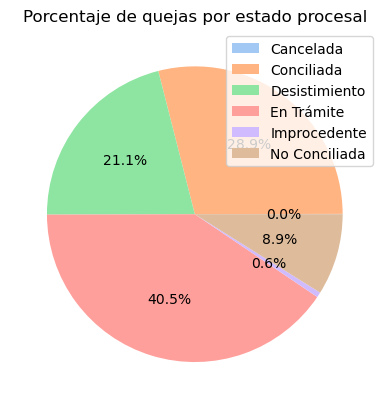

ESTADO_PROCESAL
Cancelada           29
Conciliada       23697
Desistimiento    17254
En Trámite       33155
Improcedente       460
No Conciliada     7288
Name: ID_EXP, dtype: int64

In [111]:
quejas_por_estado = df.groupby('ESTADO_PROCESAL')['ID_EXP'].count()
plt.pie(quejas_por_estado, labels=None, autopct='%1.1f%%', colors=sns.color_palette("pastel"))
plt.legend(labels=quejas_por_estado.index, loc='upper right')
plt.title('Porcentaje de quejas por estado procesal')
plt.show()
quejas_por_estado

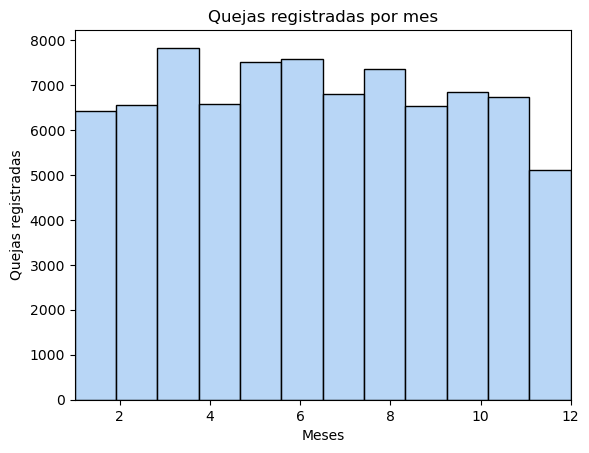

,FECHA_INGRESO,count
0,1,6429
1,2,6560
2,3,7828
3,4,6581
4,5,7517
5,6,7585
6,7,6804
7,8,7352
8,9,6525
9,10,6848


In [112]:
sns.set_palette("pastel")
meses = df['FECHA_INGRESO'].dt.month
grafico = sns.histplot(meses, bins=12)
plt.xlabel('Meses')
plt.ylabel('Quejas registradas')
plt.title('Quejas registradas por mes')
plt.xlim(1,12)
plt.show()
df.groupby([df['FECHA_INGRESO'].dt.month])['ID_EXP'].count().reset_index(name='count')

In [113]:
media_reclamado, media_recuperado = df['MONTO RECLAMADO'].mean(), df['MONTO RECUPERADO'].mean()
print(f'La cantidad reclamada de media es de {media_reclamado:.2f}€, pero la cantidad recuperada de media es de {media_recuperado:.2f}€')

La cantidad reclamada de media es de 16445.98€, pero la cantidad recuperada de media es de 16634.16€


In [114]:
print('Estos son los siete sectores que más quejas han recibido:')
df.groupby('SECTOR')['ID_EXP'].count().reset_index(name='count').sort_values(['count'], ascending=False).head(7)

Estos son los siete sectores que más quejas han recibido:


,SECTOR,count
230,TURÍSTICO,10636
54,ELECTRICIDAD,10134
222,TIENDA DEPARTAMENTAL,5152
20,AUTOMOTRIZ,4123
238,VENTAS POR INTERNET,4071
227,TIENDAS DE AUTOSERVICIO,3971
44,COMPAÑÍA DE AUTOFINANCIAMIENTO,3320


In [115]:
print('Estos son los siete comercios que más quejas han recibido:')
df.groupby('NOMBRE_COMERCIAL')['ID_EXP'].count().reset_index(name='count').sort_values(['count'], ascending=False).head(7)

Estos son los siete comercios que más quejas han recibido:


,NOMBRE_COMERCIAL,count
3722,CFE,10135
21818,WALMART,3376
14874,MERCADOLIBRE,2755
338,AEROMÉXICO,2200
21759,VIVA AEROBUS,1579
13305,LIVERPOOL,1339
4630,COPPEL,1067


In [116]:
df_cerradas = df.dropna(subset=['FECHA_FIN', 'FECHA DE CIERRE'])
df_cerradas = df_cerradas.assign(tiempo_resolucion=(df_cerradas['FECHA_FIN']-df_cerradas['FECHA_INGRESO']).dt.days)
media_resolucion = df_cerradas['tiempo_resolucion'].mean()
print(f'De media, las quejas tardan en resolverse {media_resolucion:.0f} días')

De media, las quejas tardan en resolverse 82 días


In [117]:
print('Datos de la queja que más tardó en resolverse: ')
df_cerradas.sort_values(['tiempo_resolucion'], ascending=False).head(1)

Datos de la queja que más tardó en resolverse: 


,ID_EXP,FECHA_INGRESO,FECHA_FIN,FECHA DE CIERRE,TIPO_CONCILIACION,ESTADO_PROCESAL,PROVEEDOR,NOMBRE_COMERCIAL,GIRO,SECTOR,...,MONTO RECLAMADO,MONTO RECUPERADO,PROCEDIMIENTO,BIEN O SERV,MEDIO INGRESO,TIPO PROD,MODALIDAD COMPRA,MODALIDAD PAGO,PROB ESPECIAL,tiempo_resolucion
615,2022_5416,2022-01-05,2022-12-28,2022-12-28,Turnada a Concil Person p/seg,Conciliada,CFE SUMINISTRADOR DE SERVICIOS BASICOS,CFE,SUMINISTRADOR DE ENERGÍA ELÉCTRICA,ELECTRICIDAD,...,0.0,0.0,Conciliación personal,Servicio,Personal,Servicio normal,En establecimiento físico,Contado,No problema especial,357
